In [ ]:
# Debt Calculation WebApp

## Overview
This Python application provides insights into debt repayment plans and financial savings strategies. Users can input multiple debts, monthly payments, and savings, and the app calculates projections on how long it will take to pay off debts and how savings can accelerate repayment.

The app will use a simple and intuitive web interface built with **Streamlit**, a framework designed for building data-driven web apps in Python.

---

### File Structure

```
DebtCalculationWebApp/
|-- app.py              # Main Streamlit app script
|-- debt_calculator.py  # Backend calculations for debts
|-- requirements.txt    # Dependencies for the project
|-- README.md           # Project overview and setup instructions
```

---

### Code Implementation

#### 1. Backend Calculation (`debt_calculator.py`)
This module will house the logic for handling multiple debts and generating financial insights. The calculations from your script will be refactored into functions that can process any number of debts.

```python
import pandas as pd
import calendar

def calculate_new_duration(debt, extra_savings_per_month):
    total_remaining = debt["monthly_payment"] * debt["remaining_months"]
    additional_payment = extra_savings_per_month
    return round(total_remaining / (debt["monthly_payment"] + additional_payment), 2)

def generate_financial_insight(debts, savings_per_month, duration_months):
    data = []
    total_savings = 0
    remaining_debts = {
        debt_id: debt["monthly_payment"] * debt["remaining_months"]
        for debt_id, debt in debts.items()
    }

    for month in range(1, duration_months + 1):
        total_savings += savings_per_month
        payments = {}

        for debt_id, remaining in remaining_debts.items():
            payment = min(debts[debt_id]["monthly_payment"], remaining)
            remaining_debts[debt_id] -= payment
            payments[debt_id] = payment

        year = 2025 + (month - 1) // 12
        month_name = calendar.month_abbr[(month - 1) % 12 + 1]
        formatted_month = f"{month_name}-{str(year)[-2:]}"

        data.append({
            "Month": formatted_month,
            "Total Savings": total_savings,
            **{f"Remaining Debt {debt_id}": remaining for debt_id, remaining in remaining_debts.items()},
            **{f"Payment to Debt {debt_id}": payment for debt_id, payment in payments.items()},
        })

    return pd.DataFrame(data)
```

#### 2. Main Web App (`app.py`)
The Streamlit app will provide a user-friendly interface to:
- Input debt details and savings information.
- Display debt repayment projections and insights as interactive tables and graphs.

```python
import streamlit as st
from debt_calculator import generate_financial_insight

st.title("Debt Calculation WebApp")

# User inputs for debts
st.sidebar.header("Debts")
num_debts = st.sidebar.number_input("Number of Debts", min_value=1, value=2, step=1)

debts = {}
for i in range(1, num_debts + 1):
    st.sidebar.subheader(f"Debt {i}")
    monthly_payment = st.sidebar.number_input(f"Monthly Payment (Debt {i})", min_value=0, value=1000, step=100)
    remaining_months = st.sidebar.number_input(f"Remaining Months (Debt {i})", min_value=1, value=12, step=1)
    debts[i] = {"monthly_payment": monthly_payment, "remaining_months": remaining_months}

# Savings inputs
savings_per_month = st.sidebar.number_input("Monthly Savings", min_value=0, value=2000, step=100)
duration_months = st.sidebar.slider("Duration to Calculate (Months)", min_value=12, max_value=60, value=36)

# Generate financial insights
financial_insight_df = generate_financial_insight(debts, savings_per_month, duration_months)

st.subheader("Debt Repayment Insights")
st.dataframe(financial_insight_df)

st.subheader("Summary")
remaining_debt_summary = financial_insight_df.iloc[-1][[col for col in financial_insight_df.columns if "Remaining Debt" in col]]
st.write("Remaining Debt at End of Period:")
st.write(remaining_debt_summary)
```




     Month  Total Savings  Remaining Debt 1  Remaining Debt 2  \
0   Jan-25           2000             66880             19950   
1   Feb-25           4000             63360             19000   
2   Mar-25           6000             59840             18050   
3   Apr-25           8000             56320             17100   
4   May-25          10000             52800             16150   
5   Jun-25          12000             49280             15200   
6   Jul-25          14000             45760             14250   
7   Aug-25          16000             42240             13300   
8   Sep-25          18000             38720             12350   
9   Oct-25          20000             35200             11400   
10  Nov-25          22000             31680             10450   
11  Dec-25          24000             28160              9500   
12  Jan-26          26000             24640              8550   
13  Feb-26          28000             21120              7600   
14  Mar-26          30000

In [ ]:
#### 3. Requirements (`requirements.txt`)
Specify the dependencies for the project:
```
pandas
streamlit

SyntaxError: expected 'else' after 'if' expression (3104523004.py, line 2)

In [4]:
import pandas as pd 
datapath=r'C:\Users\msi\Downloads\product_sales.csv'
df=pd.read_csv(datapath)



In [18]:
# Define a mapping of incorrect or inconsistent entries to valid categories
sales_method_mapping = {
    'Email': 'Email',
    'email': 'Email',
    'Call': 'Call',
    'Email + Call': 'Email + Call',
    'em + call': 'Email + Call'
}

# Apply the mapping to standardize the `sales_method` column
df['sales_method'] = df['sales_method'].map(sales_method_mapping)

# Replace any unmapped (invalid) values with 'Unknown'
df['sales_method'] = df['sales_method'].fillna('Unknown')


In [30]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [31]:
group_means = df.groupby('sales_method')['revenue'].transform('mean')

In [32]:
df['revenue'] = df['revenue'].fillna(group_means)


In [39]:
new=df[df['years_as_customer']<2024-1984]

In [41]:
df.loc[df['years_as_customer'] > 2024-1984, 'years_as_customer'] = pd.NA

In [44]:
df['years_as_customer'].isnull().sum()

np.int64(2)

In [45]:
group_representative = df.groupby('sales_method')['years_as_customer'].transform('mean')

In [46]:
df['years_as_customer'] = df['years_as_customer'].fillna(group_representative)

In [47]:
df['years_as_customer'] = df['years_as_customer'].astype(int)

In [55]:
df['state']=df['state'].astype(str)

In [56]:
df['state'].dtypes

dtype('O')

In [58]:
import seaborn as sns 
df_group=df.groupby('sales_method').count()


[Text(0.5, 0, 'Approach'), Text(0, 0.5, 'Count of Customers')]

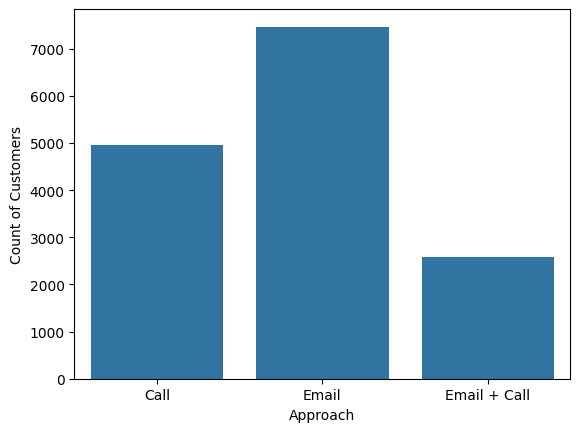

In [91]:
ax=sns.barplot(data=df_group.reset_index(), x='sales_method', y='customer_id')
ax.set(xlabel='Approach', ylabel='Count of Customers')


[Text(0.5, 0, 'Revenue'), Text(0, 0.5, 'Approach')]

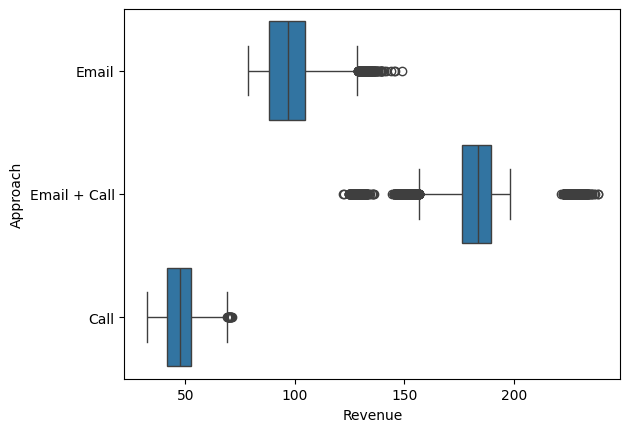

In [93]:
ax=sns.boxplot(data=df,x='revenue',y='sales_method')
ax.set(xlabel='Revenue', ylabel='Approach')

C:\Users\msi\AppData\Local\Temp\ipykernel_13584\810483637.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.lineplot(data=df,x='week',y='revenue',ci=False)


[Text(0.5, 0, 'Week'), Text(0, 0.5, 'Revenue')]

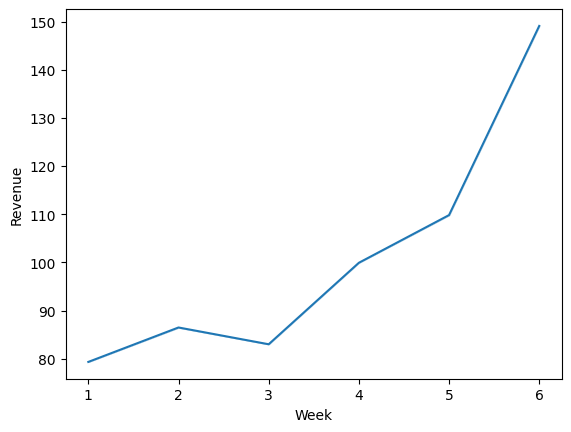

In [94]:
ax=sns.lineplot(data=df,x='week',y='revenue',ci=False)
ax.set(xlabel='Week', ylabel='Revenue')

In [105]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the cleaned data

# Step 1: Group the data by sales method and calculate total revenue and number of customers for each method
rpc_data = df.groupby('sales_method').agg(
    total_revenue=('revenue', 'sum'),
    num_customers=('customer_id', 'nunique')
)

# Step 2: Calculate Revenue per Customer (RPC)
rpc_data['rpc'] = rpc_data['total_revenue'] / rpc_data['num_customers']

# Display the result
print(rpc_data[['rpc']])


# Define the time spent per customer for each sales method in hours
time_per_customer = {
    'Email': 0.01,  # No time spent for email-based sales
    'Call': 0.5,  # 30 minutes per customer for calls
    'Email + Call': 0.200  # 10 minutes per customer for email + call
}

# Add the time spent per customer to the grouped data
rpc_data['time_spent_per_customer'] = rpc_data.index.map(time_per_customer)

# Calculate Total Time Spent for each method
rpc_data['total_time_spent'] = rpc_data['num_customers'] * rpc_data['time_spent_per_customer']

# Calculate Revenue per Hour (RPH)
rpc_data['rph'] = rpc_data['total_revenue'] / rpc_data['total_time_spent']

# Display the RPH
print(rpc_data[['rph']])


                     rpc
sales_method            
Call           47.597467
Email          97.127684
Email + Call  183.651233
                      rph
sales_method             
Call            95.194934
Email         9712.768420
Email + Call   918.256163


In [101]:
rph=df.groupby('sales_method').count()['customer_id']

In [102]:
rph

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64